# Seaborn 다변량 데이터 시각화

## #01. 기본 준비

### 패키지 참고

In [33]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
from pandas import read_excel
import seaborn as sb
import numpy as np

#### 그래프 전역 설정



In [34]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

### 데이터 준비하기
 타이타닉 탑승객 데이터
 

In [56]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")

df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## #02. 다변량 범주형 데이터 시각화

다변령 범주형 자료는 변량이 2개 이상이면서 y변수가 범주형 데이터인 데이터

빈도 막대그래프를 사용할 수 있음.

### 1) 병렬 막대 그래프

병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각 캔버스에 병렬로 나열한 그래프

Seaborn으로 병렬 빈도 막대그래프를 그래려면 sns.catplot 함수에 kind = "count"와 col옵션을 추가한다

TypeError: 'tuple' object is not callable

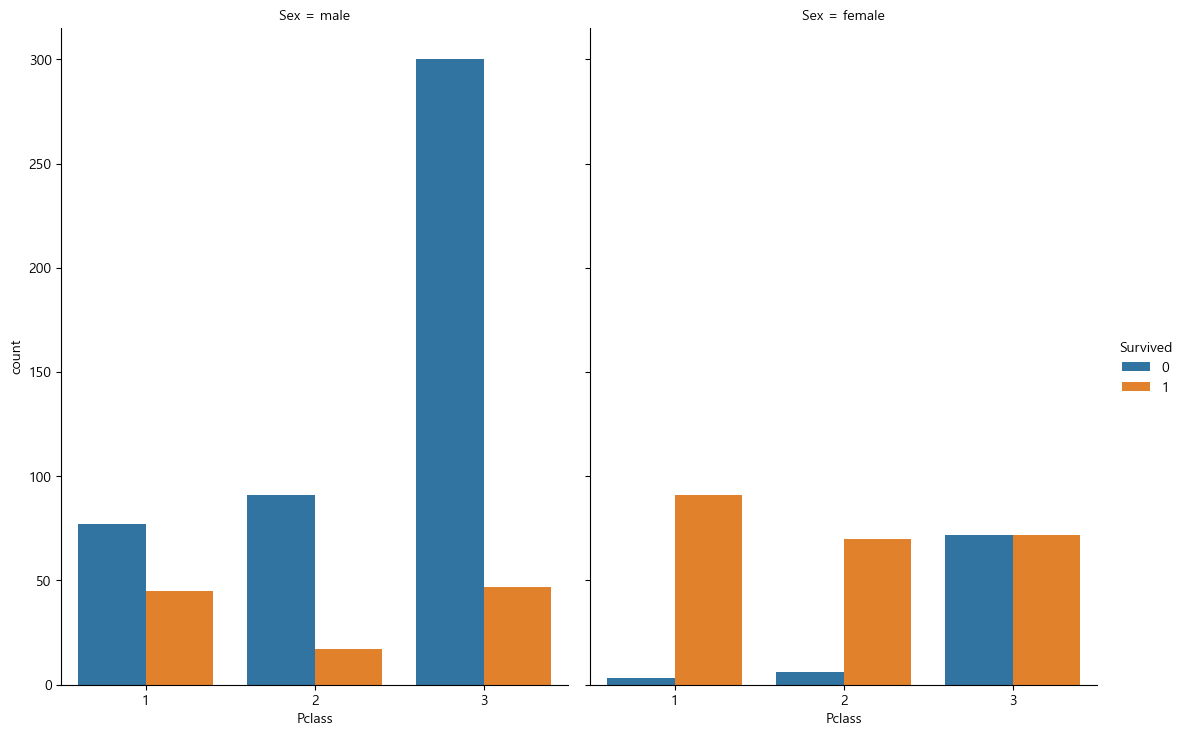

In [36]:
g = sb.catplot(data=titanic,
                x='Pclass',
                hue='Survived',
                col="Sex",
                kind="count")

g.fig.set_figwidth(12)
g.fig.set_figheight(8)

plt.xticks([0,1,2],['1등급','2등급','3등급'])
plt.show()

###  2) 다중 막대그래프

다중 막대그래프는 sns.countplot() 또는 sns.catplot()에 hue 파라미터를 설정해서 그릴 수 있따. 

hue 옵셥은 변량을 색상으로 구분하는 파라미터이다.

#### 수직 다중 막대그래프 (1) - countplot()
countplot 함수로 수직 다중 막대그래프를 그리려면 해당 함수의 x파라미터에 가로축 범주로 사용할 데이터프레임의 열 이름을 입력하고, hue 파라미터에 다른 생각으로 구분할 데이터 프레임의 열이름을 입력한다

coutplot 명령을 사용하면 각 카테고리 값 별로 데이터가 얼마나 있는지 표시할 수 있다.

countplot(data=dataFrame,x="col_name)

data인수에는 대상이 되는 데이터프레임을 , x 인수에는 데이터프레임의 열이름 문자열을 넣는다



TypeError: 'tuple' object is not callable

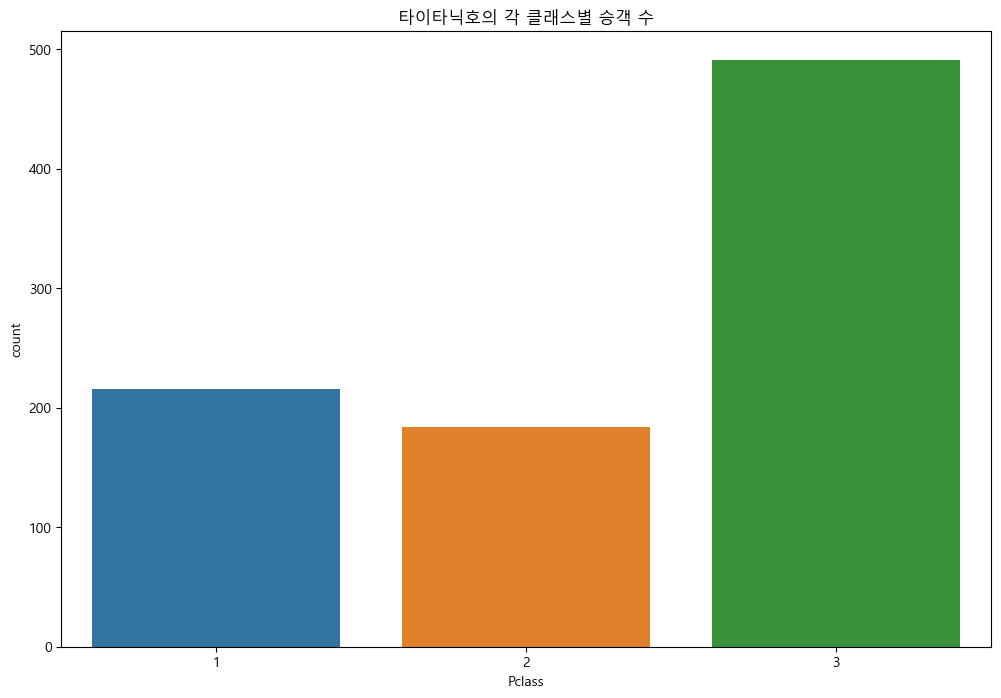

In [31]:
sb.countplot(data=titanic,x="Pclass")
plt.title("타이타닉호의 각 클래스별 승객 수")
plt.xticks([0,1,2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()

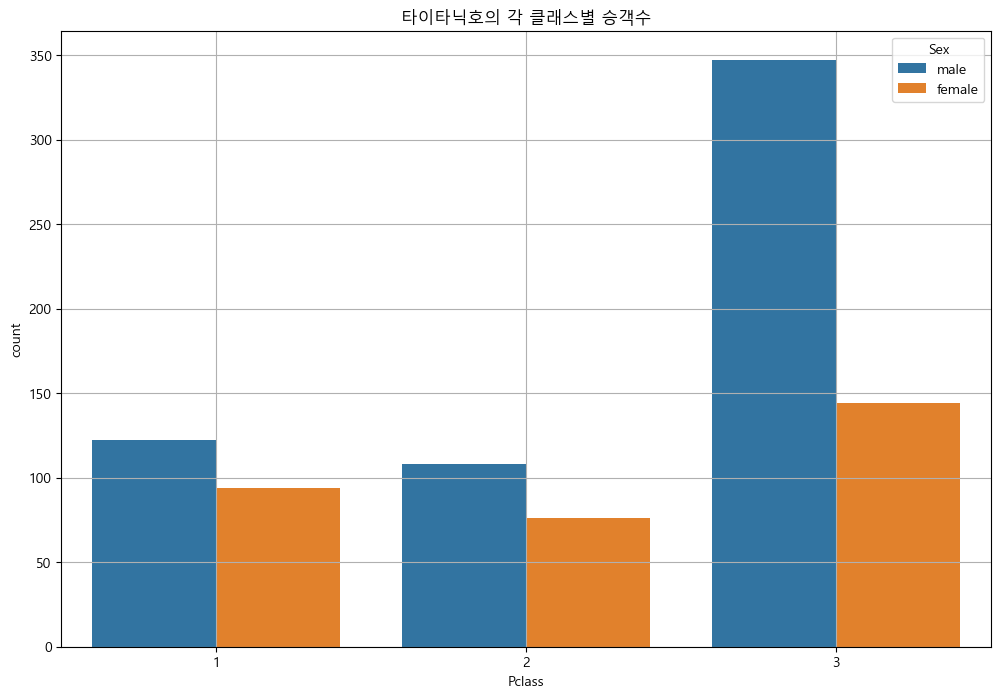

In [26]:
sb.countplot(data=titanic,x="Pclass",hue="Sex")
plt.title("타이타닉호의 각 클래스별 승객수")
plt.xticks=([0,1,2],['1등급', '2등급', '3등급'])
plt.grid()
plt.show()


#### 수직 다중 막대그래프 (2) - caplot()

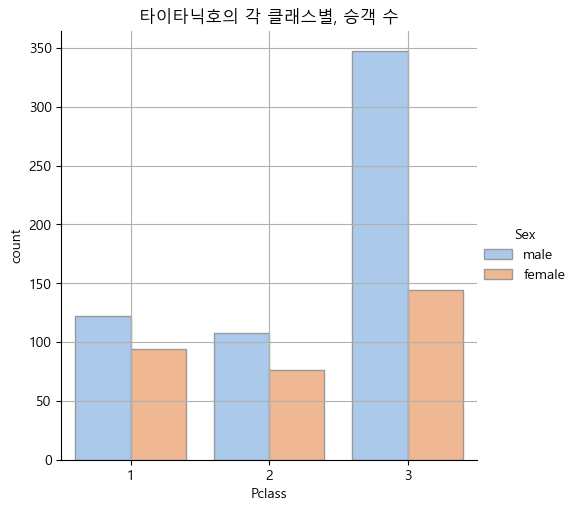

In [39]:
sb.catplot(data=titanic,x="Pclass",hue="Sex",kind = "count",palette='pastel'
,edgecolor='.6')

plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.xticks=([0,1,2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()

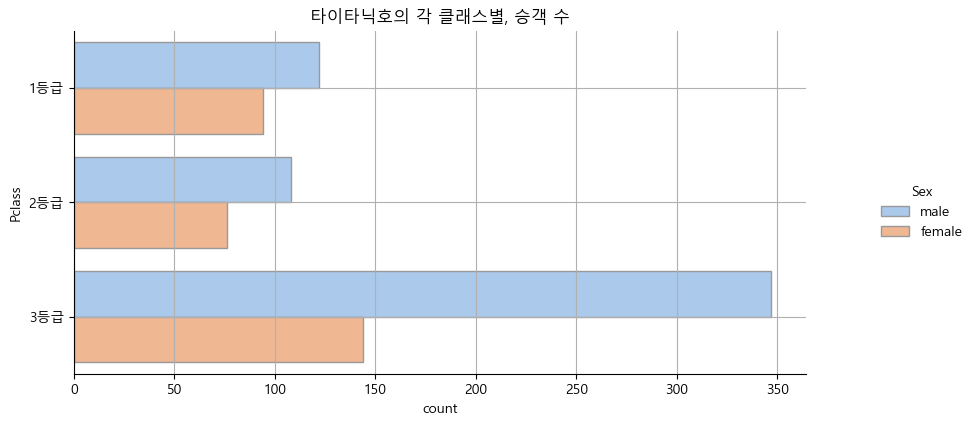

In [37]:
g = sb.catplot(data=titanic, y='Pclass', hue='Sex', kind='count', 
            palette='pastel', # 색상표 지정
            edgecolor='.6', # 막대 테두리 색상 투명도 지정
        )

g.fig.set_figwidth(10)
g.fig.set_figheight(4)

plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.yticks([0,1,2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()

### 3) 누적 막대그래프

#### 단순수직 누적
Seaborn으로 누적 막대그래프를 만들려면 histplot 함수에 multiple="stack" 옵션 사용

<Axes: xlabel='Sex', ylabel='Count'>

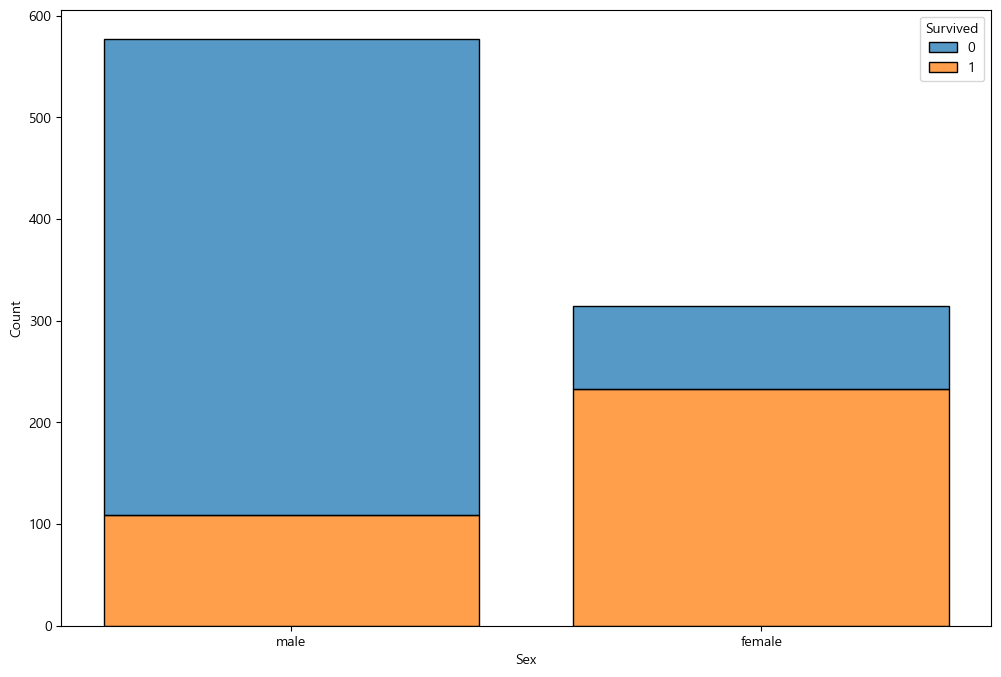

In [41]:
sb.histplot(data=titanic,x="Sex",hue="Survived",
multiple="stack" ## 누적 막대그래프
,shrink=.8,)    ## 막대사이 간격조정

### 단순 수평 누적
수평 누적 막대그래프를 그리려면 x 파라미터 대신 y 파라미터를 사용

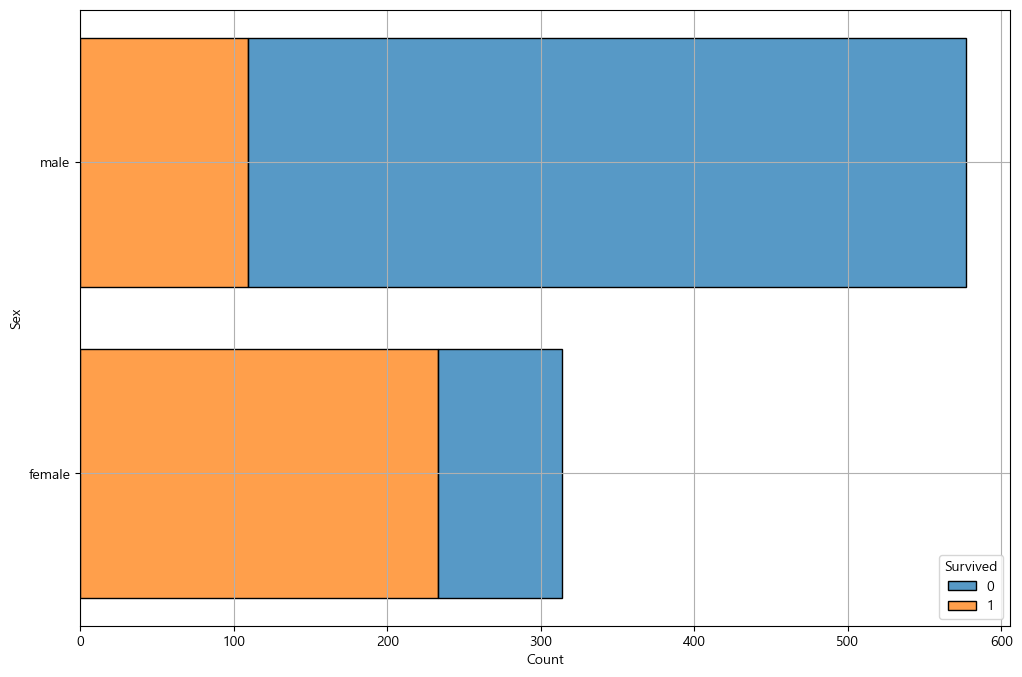

In [42]:
ax = sb.histplot(data=titanic, y='Sex', hue='Survived',  
                  multiple='stack', # 누적 막대그래프 그리기
                  shrink=.8, # 막대 사이 간격 조정
                )
plt.grid()
plt.show()

### 모자이크 그래프

막대그래프 외에도 변량이 모두 버뭊형인 다타원 데이터를 시각화 할 떄는 모자이크 그래프를 사용하기도 한다

모자이크 그래프는 그룹내의 데이터 백분율을 보여주는 막대그래프이다.

모자이크 그래프는 변수가 3개이상일 때도 사용할 수 있다.

모자이크 그래프는 statmodels.graphics.mosaic 패키지의 mosaic 함수를 이용해서 그린다.

In [43]:
props = lambda key: {'color': 'teal' if '1' in key else 'lightgray'}
labelizer = lambda k: {('female','1'): '여성\n(생존)', ('female','0'): '여성\n(사망)',
                        ('male','1'): '남성\n(생존)', ('male', '0'): '남성\n(사망)'}[k]


                        


Text(0.5, 1.0, '타이타닉호 성별 생존자')

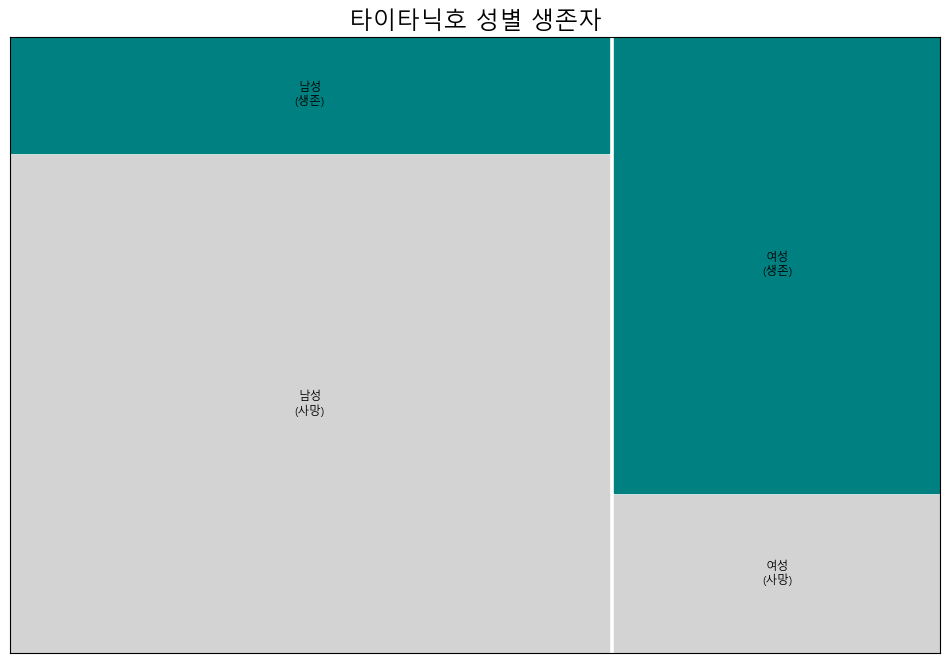

In [46]:
mosaic(titanic,
        ['Sex','Survived'],
        properties=props, # 색상 변경
        labelizer=labelizer, # 라벨 변경
        axes_label=False) # 축 라벨 숨기기

plt.title('타이타닉호 성별 생존자', fontsize=17) # 제목 내용 및 글자 크기 설정

### 요약 통계값 막대 그래프
요약 통계값 막대그래프는 범주로 구분되는 수치형 자료의 평균과 그 평균의 95% 신뢰구간(confidence intervals)을 나타낸 막대그래프

신뢰구간은 막대 위 검정색 수직 선으로 표현됨.

요약 통계값 막대그래프를 그리려면 barplot 함수를 사용

sns.catplot 함수에 kind='bar' 옵션을 주어도 된다.

#### 수직 요약 막대그래프

TypeError: 'tuple' object is not callable

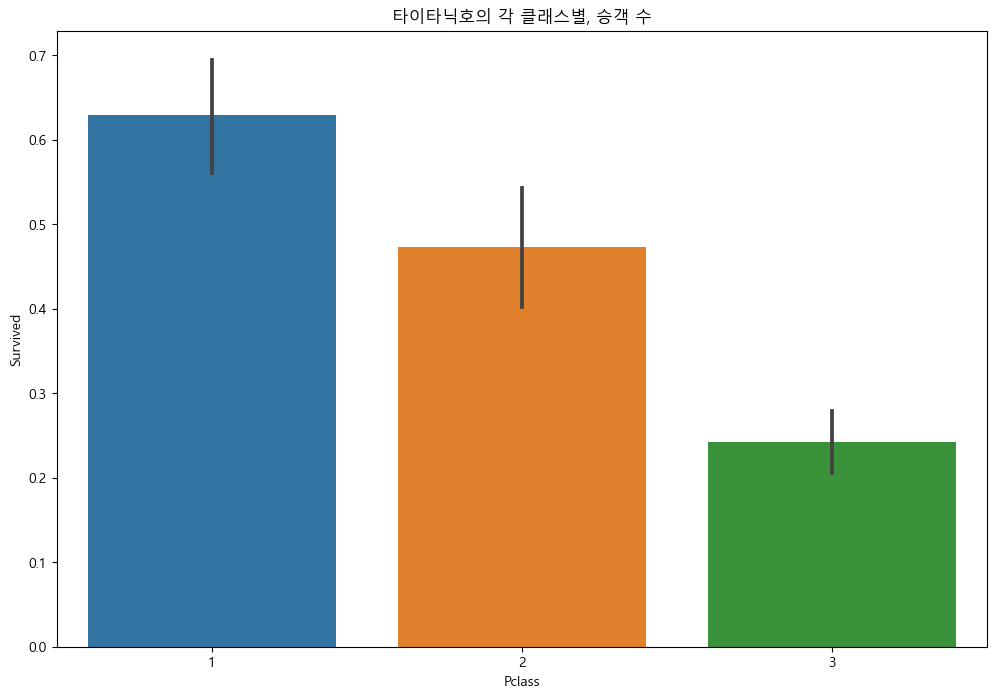

In [47]:
sb.barplot(x='Pclass', y='Survived', data=titanic)

plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.xticks([0,1,2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()

### 수직 다중 요약그래프

여기에 errorbar='sd' 옵션을 주면 신뢰구간이 아니라 표준편차를 표현할 수 있다. 

또한 hue 옵션을 사용하여 집단별로 색상을 다르게 표현할 수 있다.

<Axes: xlabel='Pclass', ylabel='Survived'>

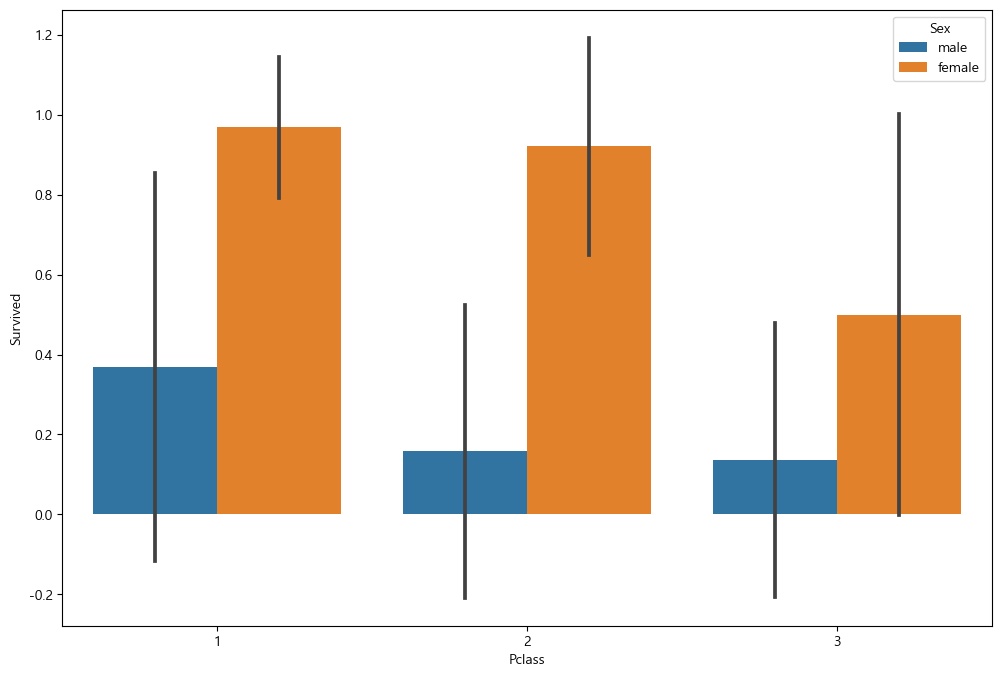

In [48]:
sb.barplot(x="Pclass",y="Survived",hue="Sex",errorbar="sd",data=titanic)

#### catplot 함수를 사용한 요약 막대 그래프

TypeError: 'tuple' object is not callable

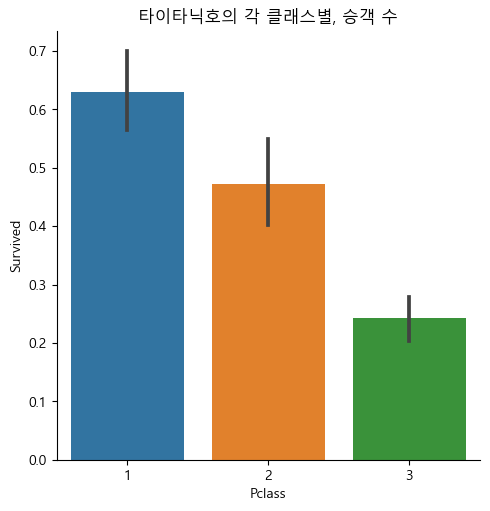

In [49]:
sb.catplot(x='Pclass', y='Survived', kind='bar', data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.xticks([0,1,2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()

TypeError: 'tuple' object is not callable

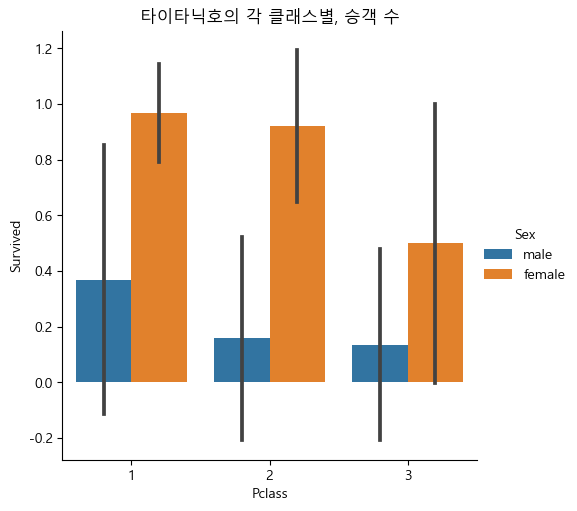

In [50]:
fig = sb.catplot(x='Pclass', y='Survived', hue='Sex', errorbar='sd', kind='bar', data=titanic)

plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.xticks([0,1,2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()

#### 수평 요약 막대 그래프

수평 다중 요약 막대그래프를 그릴떄는 orient=h 파라미터 추가


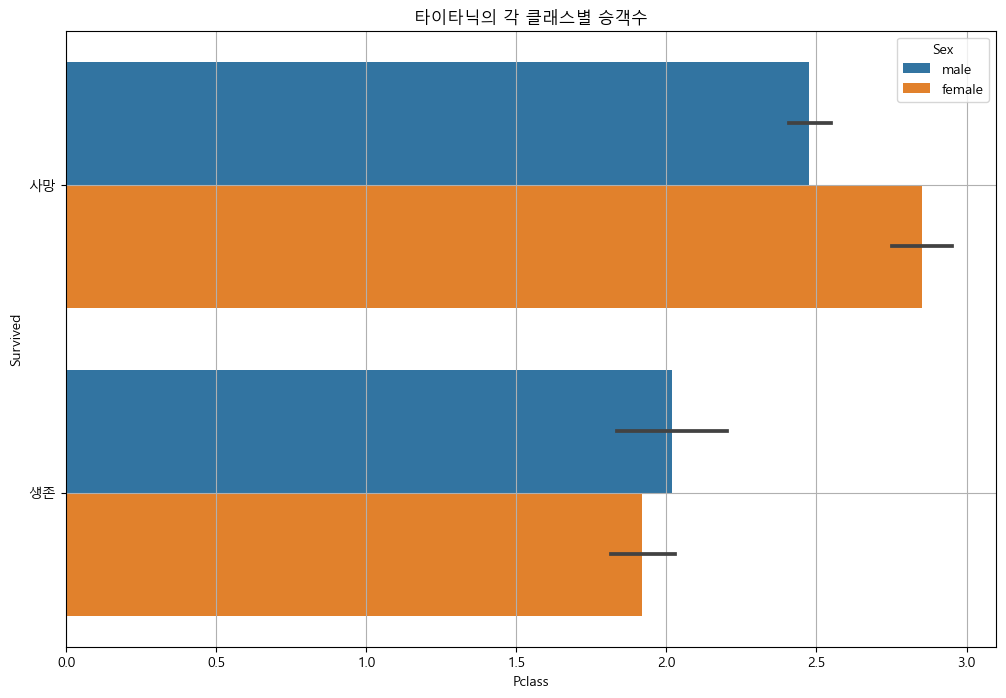

In [54]:
sb.barplot(x="Pclass",y="Survived",hue="Sex",orient='h',data=titanic)

plt.title("타이타닉의 각 클래스별 승객수")
# plt.xticks([0,1,2], ['1등급', '2등급', '3등급'])
plt.yticks([0,1], ['사망', '생존'])
plt.grid()
plt.show()

#### 집단별 산점도 그래프

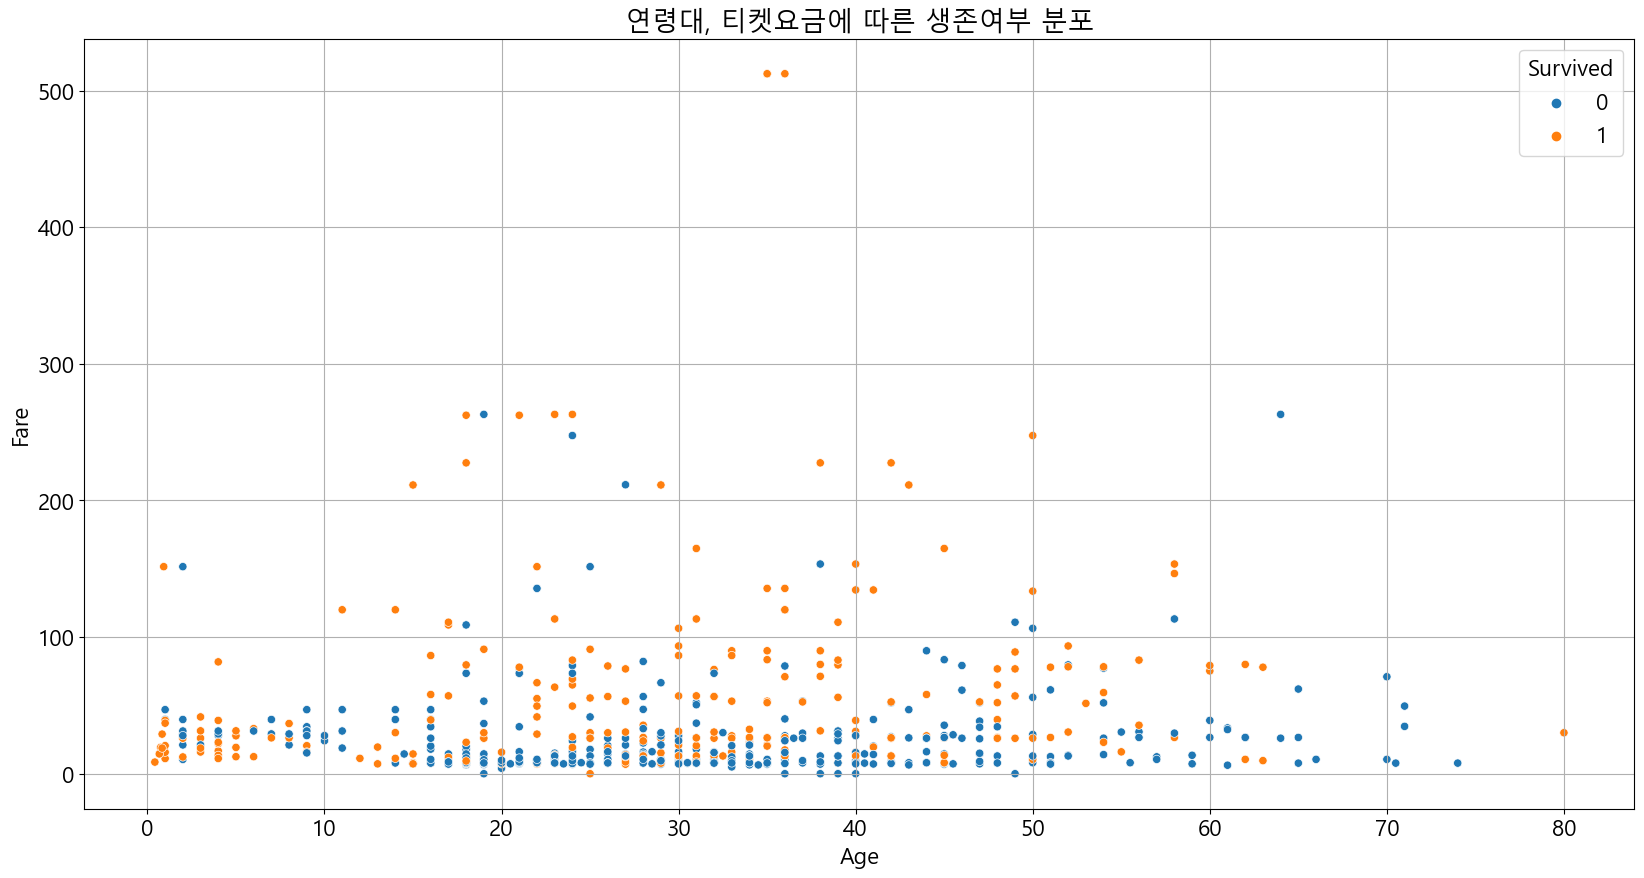

In [55]:

plt.rcParams["font.size"] = 16               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (20, 10)    # 그래프 사이즈 (가로,세로)inch

sb.scatterplot(data=titanic,x="Age",y="Fare",hue="Survived")
plt.title("연령대, 티켓요금에 따른 생존여부 분포")
plt.grid()
plt.show()
